# Общее
Максимально использовать Pandas и Plotly или Bokeh или GeoPandas (для визуализации карты Мира со странами). Применение излишних циклов ведет к снижению баллов (циклы - ЗЛО). Применение ненужных функций - аналогично. Используйте apply, map и lambda по максимуму. Помним про корректное применение сортировок.

Вспоминаем английский:

csv_airports_v1.csv:
- `Airport ID`	Unique OpenFlights identifier for this airport.
- `Name of airport`. May or may not contain the City name.
- `City`	Main city served by airport. May be spelled differently from Name.
- `Country`	Country or territory where airport is located. See Countries to cross-reference to ISO 3166-1 codes.
- `IATA`	3-letter IATA code. Null if not assigned/unknown.
- `ICAO`	4-letter ICAO code. Null if not assigned.
- `Latitude`	Decimal degrees, usually to six significant digits. Negative is South, positive is North.
- `Longitude`	Decimal degrees, usually to six significant digits. Negative is West, positive is East.
- `Altitude`	In feet.
- `Timezone`	Hours offset from UTC. Fractional hours are expressed as decimals, eg. India is 5.5.
- `DST`	Daylight savings time. One of E (Europe), A (US/Canada), S (South America), O (Australia), Z (New Zealand), N (None) or U (Unknown). See also: Help: Time
- `Tz database timezone`	Timezone in "tz" (Olson) format, eg. "America/Los_Angeles".


csv_routes_v1.csv:
- `Airline`	2-letter (IATA) or 3-letter (ICAO) code of the airline.
- `Airline ID`	Unique OpenFlights identifier for airline (see Airline).
- `Source airport`	3-letter (IATA) or 4-letter (ICAO) code of the source airport.
- `Source airport ID`	Unique OpenFlights identifier for source airport (see Airport)
- `Destination airport`	3-letter (IATA) or 4-letter (ICAO) code of the destination airport.
- `Destination airport ID`	Unique OpenFlights identifier for destination airport (see Airport)
- `Equipment`	3-letter codes for plane type(s) generally used on this flight, separated by spaces

## Задание 1
Скачать данные из `csv_airports_v1.csv` и `csv_routes_v1.csv` в виде датафрейма в переменные `airports` и `routes`.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import geopandas as gpd

In [2]:
airports = pd.read_csv('csv_airports_v1.csv')
routes = pd.read_csv('csv_routes_v1.csv')
display(airports.head(3))
display(routes.head(3))


,Airport ID,Name of airport,City,Country,IATA,ICAO,Latitude,Longitude,Altitude,Timezone,DST,Tz database timezone
0,2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,20,10,U,Pacific/Port_Moresby
1,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388,10,U,Pacific/Port_Moresby
2,4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10,U,Pacific/Port_Moresby


,Airline,Airline ID,Source airport,Source airport ID,Destination airport,Destination airport ID,Equipment
0,2B,410,ASF,2966,KZN,2990,CR2
1,2B,410,ASF,2966,MRV,2962,CR2
2,2B,410,CEK,2968,KZN,2990,CR2


## Задание 2.
1. Вывести `info` по датафреймам.
2. Обратите внимание, что в `csv_airports_v1.csv` пропущенные данные закодированы как `\N` заменить их на стандартные `np.nan`
3. Повторно посмотреть `info` по датафреймам.

In [3]:
airports.info()
routes.info()
airports.replace('\\N', np.nan, inplace = True)
airports.info()
routes.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7697 entries, 0 to 7696
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Airport ID            7697 non-null   int64  
 1   Name of airport       7697 non-null   object 
 2   City                  7648 non-null   object 
 3   Country               7697 non-null   object 
 4   IATA                  7697 non-null   object 
 5   ICAO                  7697 non-null   object 
 6   Latitude              7697 non-null   float64
 7   Longitude             7697 non-null   float64
 8   Altitude              7697 non-null   int64  
 9   Timezone              7697 non-null   object 
 10  DST                   7697 non-null   object 
 11  Tz database timezone  7697 non-null   object 
dtypes: float64(2), int64(2), object(8)
memory usage: 721.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67662 entries, 0 to 67661
Data columns (total 7 columns):
 #   Co

## Задание 3.
1. Срезать данные в `airports` по наличию кода `IATA` в переменую `iata_arports`, отвяжите новую табличку от `airports`
2. В `iata_arports` добавьте столбец `Continents` с названием континента, на котором размещен аэропорт (Северная и Южная Америка разные континенты, Россия в Европе, Турция в Азии).

In [4]:
iata_arports=airports[airports['IATA'].notna()].copy()

In [5]:
!pip install pycountry_convert
import pycountry_convert as pc

#не по всем странам в библиотеке есть данные
dict_maps = {'UK':'Europe', 'Trinidad': 'South America',
             'Curacao':'South America',
       'Virgin Islands': 'South America', 'Kosovo': 'Europe', "Cote d'Ivoire": 'Africa', 'Congo (Brazzaville)':'Africa','Congo (Kinshasa)':'Africa',
             'Saint Helena':'Africa', 'Reunion':'Africa', 'Midway Islands':'Oceania', 'Antarctica':'Antarctica', 'Netherlands Antilles':'South America',
            'Burma':'Asia', 'East Timor':'Oceania', 'Johnston Atoll':'Oceania', 'Western Sahara':'Africa','Wake Island':'Oceania'}
def country_to_continent(country_name):
    try:
        country_alpha2 = pc.country_name_to_country_alpha2(country_name)
        country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
        country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
        return country_continent_name
    except:
        return dict_maps[country_name]
iata_arports['Continents'] = iata_arports['Country'].map(country_to_continent)
iata_arports

,Airport ID,Name of airport,City,Country,IATA,ICAO,Latitude,Longitude,Altitude,Timezone,DST,Tz database timezone,Continents
0,2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,20,10,U,Pacific/Port_Moresby,Oceania
1,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388,10,U,Pacific/Port_Moresby,Oceania
2,4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10,U,Pacific/Port_Moresby,Oceania
3,5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146,10,U,Pacific/Port_Moresby,Oceania
4,6,Wewak International Airport,Wewak,Papua New Guinea,WWK,AYWK,-3.583830,143.669006,19,10,U,Pacific/Port_Moresby,Oceania
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7683,14097,Bilogai-Sugapa Airport,Sugapa-Papua Island,Indonesia,UGU,WABV,-3.739560,137.031998,7348,NaN,NaN,NaN,Asia
7686,14100,Ramon Airport,Eilat,Israel,ETM,LLER,29.723694,35.011416,288,NaN,NaN,NaN,Asia
7687,14101,Rustaq Airport,Al Masna'ah,Oman,MNH,OORQ,23.640556,57.487500,349,NaN,NaN,NaN,Asia
7688,14102,Laguindingan Airport,Cagayan de Oro City,Philippines,CGY,RPMY,8.612203,124.456496,190,NaN,NaN,NaN,Asia


## Задание 4.
Реализовать случайный выбор континента и на карте Мира нанести точки аэропортов `iata_arports` для выбранного континента.

Реализуйте все континенты на отдельных `subplots`.
Нашли обшибки в данных, если да то какие?

<ipython-input-6-d99b689e4d29>:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world_data = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


Text(0.5, 1.0, 'Africa')

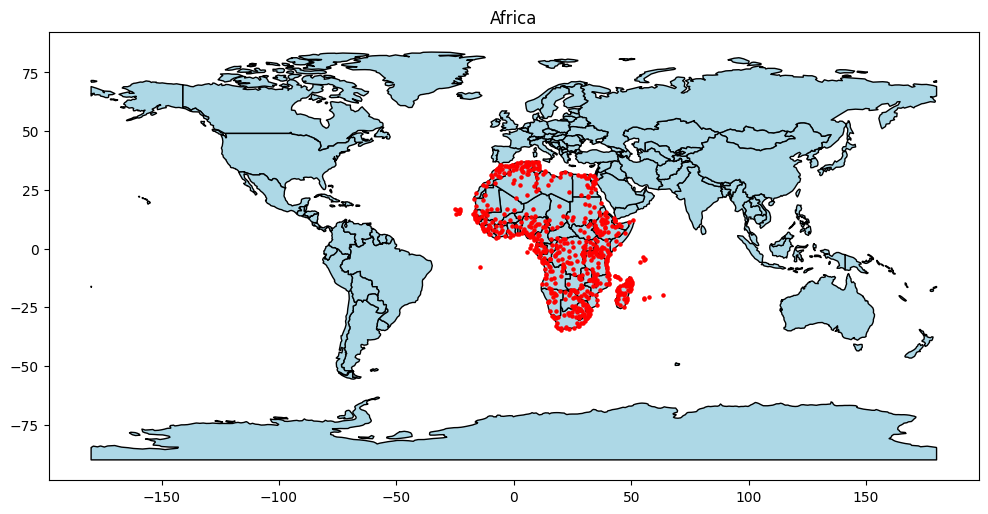

In [6]:
import random
import geopandas as gpd

randcont = random.choice(iata_arports['Continents'].unique())

gpdarports = gpd.GeoDataFrame(iata_arports, geometry=gpd.points_from_xy(iata_arports.Longitude, iata_arports.Latitude))
#библиотека ГеоПандаса с полигонами для стран
world_data = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

fig, gax = plt.subplots(figsize=(12,10))
world_data.plot(edgecolor='black', color='lightblue', ax = gax)

randcontshow = gpdarports[gpdarports['Continents'] == randcont]
randcontshow.plot(color='red', ax = gax, markersize=5)
gax.set_title(randcont)

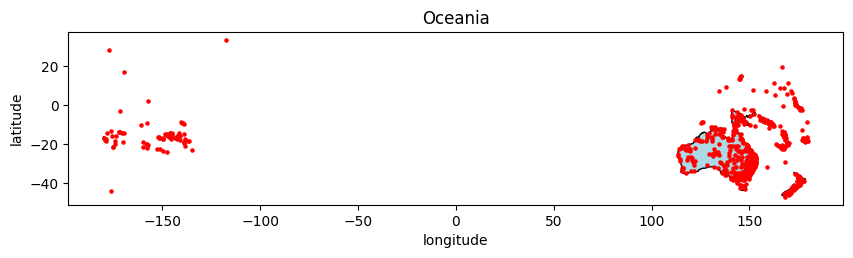

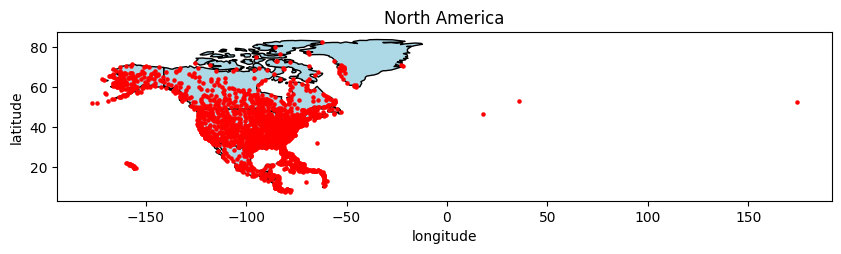

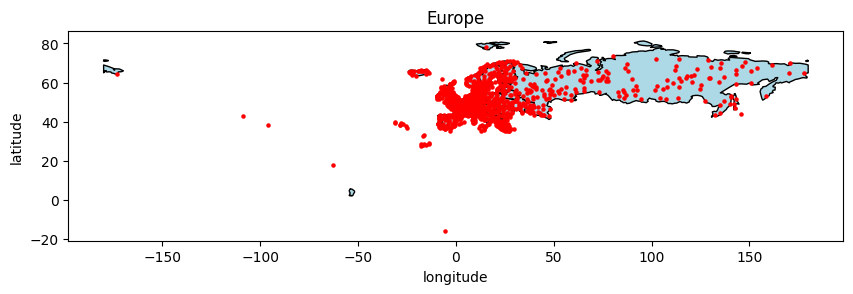

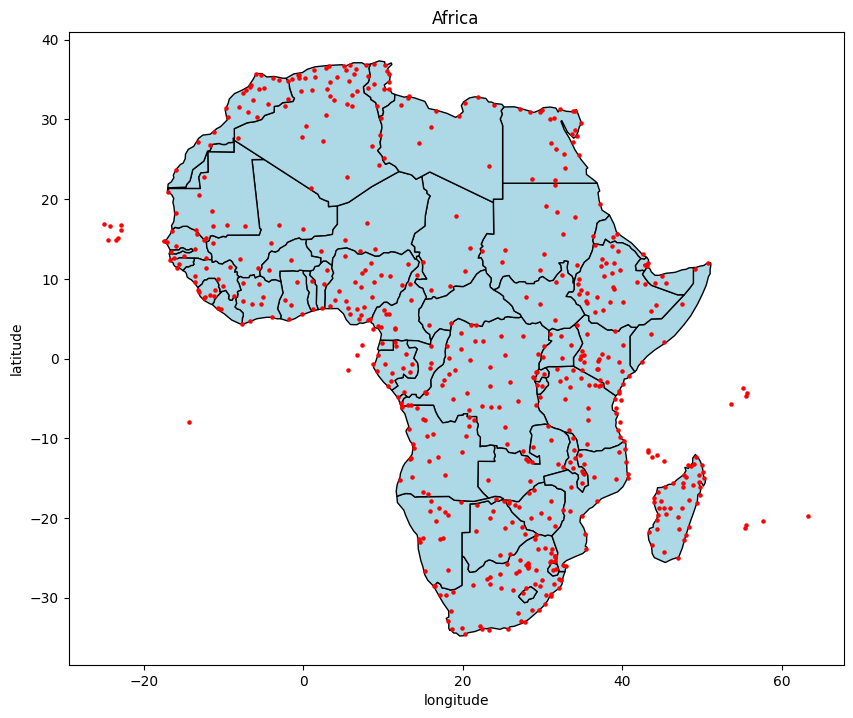

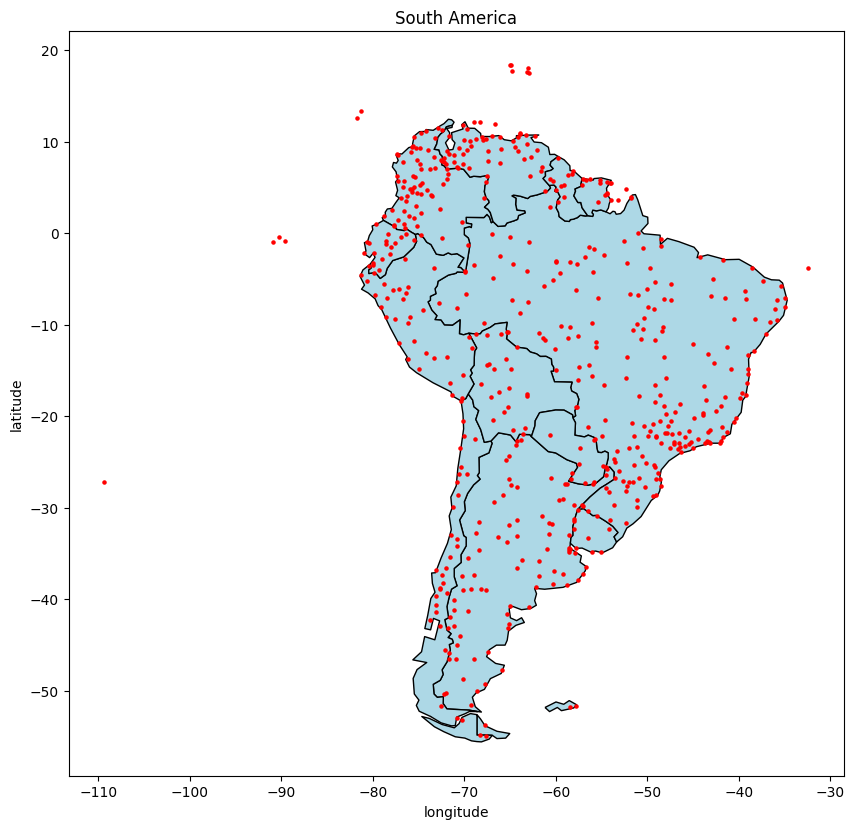

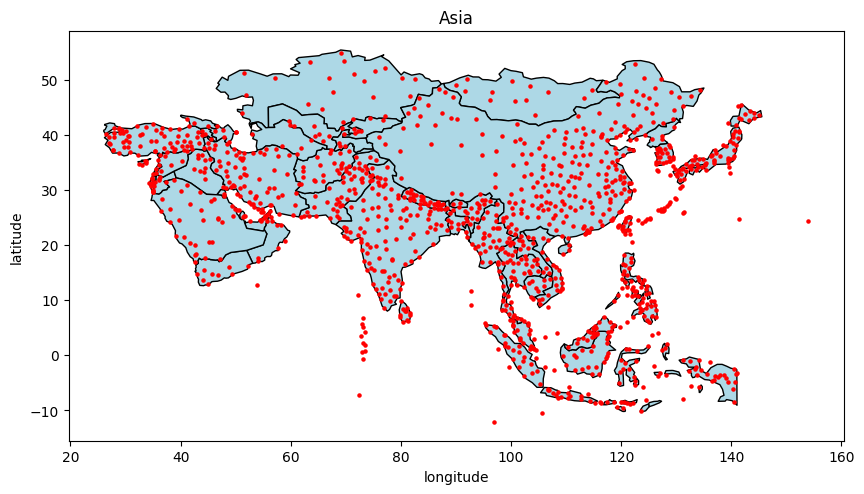

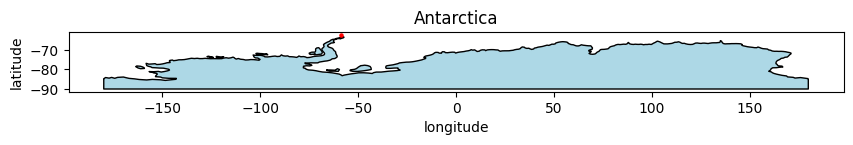

In [7]:
#все континенты на отдельных сабплотах
# Ошибки, есть, да, координаты некоторых аэропортов ошибочно приписаны неправильным континентам
for cont in iata_arports['Continents'].unique():
    fig, gax = plt.subplots(figsize=(10,10))

    world_data[world_data['continent'] == cont].plot(edgecolor='black', color='lightblue', ax = gax)
    randcontshow = gpdarports[gpdarports['Continents'] == cont]
    randcontshow.plot(ax=gax, color='red', markersize=5)

    gax.set_xlabel('longitude')
    gax.set_ylabel('latitude')
    gax.set_title(cont)

## Задание 5.
1. На основе таблиц `iata_arports` и `routes` рассчитать количество взлетов и посадок для каждой страны случайно выбранного континента собрать таблицу: индексы - страна, колонки - взеты и посадки. Упорядочить по названию страны.
2. Используя собранные данные - залить страны на карте континента по интенсивности взлет/посадок (сумма)(как пример https://plotly.com/python/mapbox-county-choropleth/).  Страна с отсутствующими данными имеет черный или белый цвет (как вам нравится).

In [9]:

randcont2 = random.choice(iata_arports['Continents'].unique())

arportviletdf = pd.merge(iata_arports, routes, left_on='IATA', right_on='Source airport')
arportvilet = arportviletdf[arportviletdf['Continents']==randcont2].groupby(['Country'])['Source airport'].count()

arportpriletdf = pd.merge(iata_arports, routes, left_on='IATA', right_on='Destination airport')
arportprilet = arportpriletdf[arportpriletdf['Continents']==randcont2].groupby(['Country'])['Destination airport'].count()

countryrouts = arportprilet + arportvilet
countryroutsdf = pd.DataFrame({'Country':countryrouts.index, 'Amount':countryrouts.values})


countryroutsdf['Country']= countryroutsdf['Country'].replace({'United States': 'United States of America', 'Congo (Kinshasa)': 'Dem. Rep. Congo',
                                   'South Sudan' : 'S. Sudan', 'Burma': 'Myanmar', 'Bosnia and Herzegovina': 'Bosnia and Herz.',  'Central African Republic': 'Central African Rep.',
                                   'Czech Republic': 'Czechia', 'Macedonia':'North Macedonia', 'Congo (Brazzaville)':'Congo'})

itog = pd.merge(arportprilet, arportvilet, on='Country')
itog

,Destination airport,Source airport
Country,,
American Samoa,1,1
Australia,1097,1113
Cook Islands,20,21
East Timor,4,4
Fiji,65,69
French Polynesia,110,110
Guam,35,35
Kiribati,7,7
Marshall Islands,7,7


In [11]:
import plotly.express as px
import json

worldflights = pd.merge(world_data, countryroutsdf, left_on='name', right_on='Country')
display(worldflights)


figg = px.choropleth_mapbox(worldflights, color=worldflights['Amount'],
                             geojson=json.loads(worldflights['geometry'].to_json()),
                            locations=worldflights.index,
                            color_continuous_scale="Viridis",
                            range_color=(0, worldflights['Amount'].max()),
                            mapbox_style="carto-positron",
                            zoom=1
                          )
figg.show()

# на гите карта может не отображаться

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Country,Amount
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Fiji,134.0
1,8776109.0,Oceania,Papua New Guinea,PNG,24829,"MULTIPOLYGON (((141.00021 -2.60015, 142.73525 ...",Papua New Guinea,313.0
2,299882.0,Oceania,Vanuatu,VUT,934,"MULTIPOLYGON (((167.21680 -15.89185, 167.84488...",Vanuatu,192.0
3,287800.0,Oceania,New Caledonia,NCL,10770,"POLYGON ((165.77999 -21.08000, 166.59999 -21.7...",New Caledonia,72.0
4,4917000.0,Oceania,New Zealand,NZL,206928,"MULTIPOLYGON (((176.88582 -40.06598, 176.50802...",New Zealand,466.0
5,25364307.0,Oceania,Australia,AUS,1396567,"MULTIPOLYGON (((147.68926 -40.80826, 148.28907...",Australia,2210.0


## Задание 6.
Для каждого континента найти 10 самых крупных аэропортов. Результат в виде датафрейма. Иерархический индекс: 1 уровень континенты по алфавиту, 2 уровень название аэропорта. В столбцах страна, город, код IATA и количество взлет посадок. Внутри континента аэропорты упорядочены по взлет/посадкам от наибольшего к наимельшему.

Нанести на карту Мира данные аэропорты разным цветом в зависимости от континента.

In [12]:
grouped_df = arportviletdf.groupby(['Continents', 'Name of airport']).agg({
    'IATA': 'count'
}).reset_index()

grouped_df1 = arportpriletdf.groupby(['Continents', 'Name of airport']).agg({
    'IATA': 'count'
}).reset_index()


grouped_df['prilet/vilet'] = grouped_df['IATA']+grouped_df1['IATA']
grouped_df = grouped_df.drop('IATA', axis=1)

grouped_df.sort_values(by=['Continents', 'prilet/vilet'], ascending=[True, False], inplace=True)

display(grouped_df)
top_10_airports = grouped_df.groupby('Continents').head(10)
display(top_10_airports)

top_10_airports.set_index(['Continents', 'Name of airport'], inplace=True)


display(top_10_airports)

,Continents,Name of airport,prilet/vilet
54,Africa,Cairo International Airport,303.0
117,Africa,Jomo Kenyatta International Airport,258.0
3,Africa,Addis Ababa Bole International Airport,214.0
107,Africa,Houari Boumediene Airport,176.0
214,Africa,Nyala Airport,164.0
...,...,...,...
3218,South America,Tancredo Thomas de Faria Airport,2.0
3219,South America,Tapuruquara Airport,2.0
3227,South America,Trombetas Airport,2.0
3228,South America,Tucuruí Airport,2.0


,Continents,Name of airport,prilet/vilet
54,Africa,Cairo International Airport,303.0
117,Africa,Jomo Kenyatta International Airport,258.0
3,Africa,Addis Ababa Bole International Airport,214.0
107,Africa,Houari Boumediene Airport,176.0
214,Africa,Nyala Airport,164.0
215,Africa,OR Tambo International Airport,160.0
191,Africa,Mohamed Boudiaf International Airport,141.0
192,Africa,Mohammed V International Airport,137.0
161,Africa,Léopold Sédar Senghor International Airport,134.0
70,Africa,Douala International Airport,98.0


prilet/vilet
Continents    Name of airport                                                 
Africa        Cairo International Airport                                303.0
              Jomo Kenyatta International Airport                        258.0
              Addis Ababa Bole International Airport                     214.0
              Houari Boumediene Airport                                  176.0
              Nyala Airport                                              164.0
              OR Tambo International Airport                             160.0
              Mohamed Boudiaf International Airport                      141.0
              Mohammed V International Airport                           137.0
              Léopold Sédar Senghor International Airport                134.0
              Douala International Airport                                98.0
Asia          Incheon International Airport                              740.0
              Istanbul Airport                                           719.0
              Dubai International Airport                                710.0
              Hong Kong International Airport                            710.0
              Guangzhou Baiyun International Airport                     674.0
              Shanghai Hongqiao International Airport                    619.0
              Beijing Capital International Airport                      615.0
              Narita International Airport                               575.0
              Beihai Airport                                             554.0
              Kunming Changshui International Airport                    545.0
Europe        London Heathrow Airport                                   1051.0
              Frankfurt am Main Airport                                  990.0
              Munich Airport                                             728.0
              London Gatwick Airport                                     708.0
              Leonardo da Vinci–Fiumicino Airport                        662.0
              Manchester Airport                                         627.0
              Vienna International Airport                               616.0
              Chania International Airport                               561.0
              Palma De Mallorca Airport                                  548.0
              Charles de Gaulle International Airport                    526.0
North America Hartsfield Jackson Atlanta International Airport           934.0
              Hattiesburg Laurel Regional Airport                        912.0
              Chicago O'Hare International Airport                       690.0
              Louis Armstrong New Orleans International Airport          621.0
              Chicago Rockford International Airport                     555.0
              Phoenix Sky Harbor International Airport                   538.0
              John Glenn Columbus International Airport                  518.0
              Dallas Love Field                                          506.0
              Los Angeles International Airport                          493.0
              Dallas Fort Worth International Airport                    471.0
Oceania       Sydney Kingsford Smith International Airport               213.0
              Tabubil Airport                                            206.0
              Brisbane International Airport                             155.0
              Bucholz Army Air Field                                     147.0
              Melbourne International Airport                            140.0
              Mildura Airport                                            138.0
              Auckland International Airport                             131.0
              Ayers Rock Connellan Airport                               121.0
              Perth International Airport                                 94.0
              Pointe Vele Airport    

Text(0.5, 1.0, 'Top 10 airports by continent')

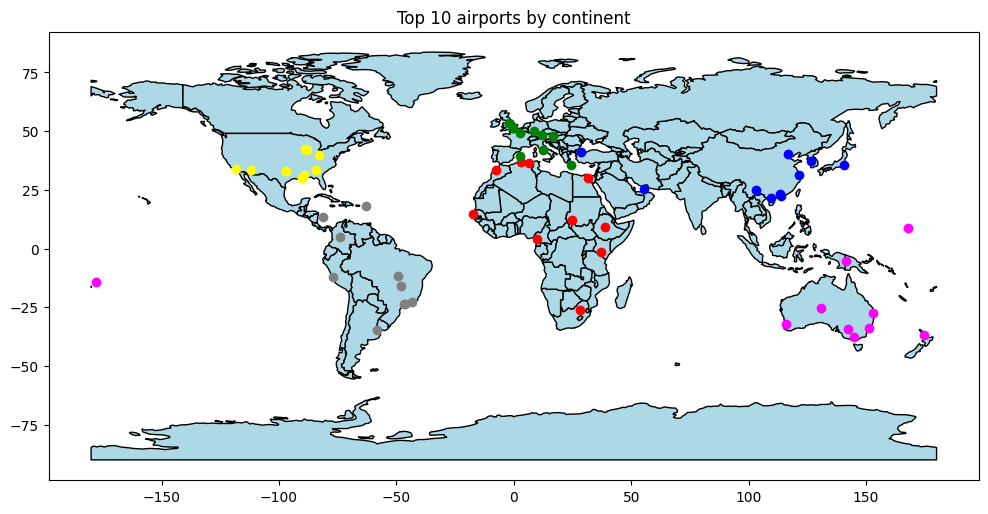

In [13]:
fig, gax = plt.subplots(figsize=(12,10))
world_data.plot(edgecolor='black', color='lightblue', ax = gax)

color = ['red', 'green', 'blue', 'yellow', 'grey']
cont = ['Africa', 'Europe', 'Asia', 'North America', 'South America']

for i in range(5):
  top_airports = gpdarports[gpdarports['Name of airport'].isin(top_10_airports.loc[cont[i]].index.to_list())]
  top_airports.plot(color=color[i], ax = gax)

top_airports = gpdarports[(gpdarports['Name of airport'].isin(top_10_airports.loc['Oceania'].index.to_list()))&(gpdarports['Continents']=='Oceania')]
# доп условие континент = океания, т.к иначе всплывал одноименный аэропорт в США, Мельбурн
top_airports.plot(color='magenta', ax = gax)

gax.set_title('Top 10 airports by continent')

## Задание 7.
В табличке `csv_routes_v1.csv` есть колонка `Equipment` - это код марки самолета в кодах IATA. Тут есть их расшифровка
https://en.wikipedia.org/wiki/List_of_aircraft_type_designators (если указаны два и более борта, считаем по перевому).

Найдите 10 самых популярных моделей самолетов, естественно с расшифровкой, с указанием количества рейсов выполняемых этими бортами (по числу посадок :)). Результат в виде датафрейма. Индекс номер по порядку, колонки - марка самолета и количество рейсов. Упорядочить от наибольшего количества рейсов вниз.

In [ ]:
routes2 = routes.copy()
routes2['Equipment_onlyone'] = routes2['Equipment'].str.split(' ').str[0]

my_table = pd.read_html('https://en.wikipedia.org/wiki/List_of_aircraft_type_designators')
air_type = my_table[0]

aircraft_types = pd.merge(routes2, air_type, left_on='Equipment_onlyone', right_on='IATA type code').dropna()

grouped_aircraft_types = aircraft_types.groupby(['IATA type code']).agg({
    'Model': 'first',
    'Destination airport ID': 'count'
}).reset_index()

grouped_aircraft_types_sort = grouped_aircraft_types.sort_values(by='Destination airport ID', ascending=False)

top_10_aircraftmodels = grouped_aircraft_types_sort.head(10)
top_10_aircraftmodels.set_index(['IATA type code'], inplace=True)
top_10_aircraftmodels


,Model,Destination airport ID
IATA type code,,
320,Airbus A320,11865
738,Boeing 737-800,8520
319,Airbus A319,5205
73H,Boeing 737-800 Winglets,2566
ATR,Aerospatiale/Alenia ATR 42-600,2344
321,Airbus A321,2145
73W,Boeing 737-700 Winglets,1811
E90,Embraer 190 / Lineage 1000,1391
AT7,Aerospatiale/Alenia ATR 72-201/-202,1387
